In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

In [2]:
data_dir = "../data"
ts_dir = os.path.join(data_dir, "TrainStation")
os.listdir(ts_dir)

['MRTLRTStnPtt.dbf',
 'MRTLRTStnPtt.sbn',
 'MRTLRTStnPtt.sbx',
 'MRTLRTStnPtt.prj',
 'MRTLRTStnPtt.shp',
 'MRTLRTStnPtt.shx',
 'MRTLRTStnPtt.cpg']

In [3]:
stn = gpd.read_file(os.path.join(ts_dir, "MRTLRTStnPtt.shp"))

In [4]:
stn.head()

,OBJECTID,STN_NAME,STN_NO,geometry
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078)
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302)
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568)
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548)
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820)


In [6]:
stn_no = stn["STN_NO"].tolist()

In [12]:
print(sorted(stn_no))

['BP1', 'BP10', 'BP11', 'BP12', 'BP13', 'BP14', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6', 'BP7', 'BP8', 'BP9', 'CC1', 'CC10', 'CC11', 'CC12', 'CC13', 'CC14', 'CC15', 'CC16', 'CC17', 'CC18', 'CC19', 'CC2', 'CC20', 'CC21', 'CC22', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'CC8', 'CC9', 'CE2', 'CG1', 'CG2', 'DT1', 'DT10', 'DT11', 'DT12', 'DT13', 'DT14', 'DT15', 'DT16 / CE1', 'DT17', 'DT18', 'DT19', 'DT2', 'DT20', 'DT21', 'DT22', 'DT23', 'DT24', 'DT25', 'DT26', 'DT27', 'DT28', 'DT29', 'DT3', 'DT30', 'DT31', 'DT32', 'DT33', 'DT34', 'DT35', 'DT5', 'DT6', 'DT7', 'DT8', 'DT9', 'EW1', 'EW10', 'EW11', 'EW12', 'EW13 / NS25', 'EW14 / NS26', 'EW15', 'EW16', 'EW17', 'EW18', 'EW19', 'EW2', 'EW20', 'EW21', 'EW22', 'EW23', 'EW24 / NS1', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW3', 'EW30', 'EW31', 'EW32', 'EW33', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8', 'EW9', 'NE1 / CC29', 'NE10', 'NE11', 'NE12', 'NE13', 'NE14', 'NE15', 'NE16', 'NE17', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'N

In [13]:
stn_no2 = []
for st in stn_no:
    if " / " in st:
        sts = st.split(" / ")
        for s in sts:
            stn_no2.append(s)
    else:
        stn_no2.append(st)
len(stn_no2)

188

In [14]:
print(sorted(stn_no2))

['BP1', 'BP10', 'BP11', 'BP12', 'BP13', 'BP14', 'BP2', 'BP3', 'BP4', 'BP5', 'BP6', 'BP7', 'BP8', 'BP9', 'CC1', 'CC10', 'CC11', 'CC12', 'CC13', 'CC14', 'CC15', 'CC16', 'CC17', 'CC18', 'CC19', 'CC2', 'CC20', 'CC21', 'CC22', 'CC23', 'CC24', 'CC25', 'CC26', 'CC27', 'CC28', 'CC29', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'CC8', 'CC9', 'CE1', 'CE2', 'CG1', 'CG2', 'DT1', 'DT10', 'DT11', 'DT12', 'DT13', 'DT14', 'DT15', 'DT16', 'DT17', 'DT18', 'DT19', 'DT2', 'DT20', 'DT21', 'DT22', 'DT23', 'DT24', 'DT25', 'DT26', 'DT27', 'DT28', 'DT29', 'DT3', 'DT30', 'DT31', 'DT32', 'DT33', 'DT34', 'DT35', 'DT5', 'DT6', 'DT7', 'DT8', 'DT9', 'EW1', 'EW10', 'EW11', 'EW12', 'EW13', 'EW14', 'EW15', 'EW16', 'EW17', 'EW18', 'EW19', 'EW2', 'EW20', 'EW21', 'EW22', 'EW23', 'EW24', 'EW25', 'EW26', 'EW27', 'EW28', 'EW29', 'EW3', 'EW30', 'EW31', 'EW32', 'EW33', 'EW4', 'EW5', 'EW6', 'EW7', 'EW8', 'EW9', 'NE1', 'NE10', 'NE11', 'NE12', 'NE13', 'NE14', 'NE15', 'NE16', 'NE17', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NE8', 'NE9', 'NS1',

In [ ]:
#manually change DT16 and CE1 to DT16-CE1
#manually change NE1 and CC29 to NE1-CC29
# in geany, replace

In [38]:
df = pd.read_csv(os.path.join(data_dir, "origin_destination_train_201912-b.csv"))
df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2019-12,WEEKENDS/HOLIDAY,9,TRAIN,EW32,DT24,1
1,2019-12,WEEKDAY,6,TRAIN,BP4,EW31,6
2,2019-12,WEEKENDS/HOLIDAY,7,TRAIN,DT26,CC26,1
3,2019-12,WEEKDAY,7,TRAIN,CC26,DT26,1
4,2019-12,WEEKENDS/HOLIDAY,7,TRAIN,CC26,DT26,1


In [39]:
origin = df["ORIGIN_PT_CODE"].tolist()
destin = df["DESTINATION_PT_CODE"].tolist()

for i in list(set(origin)):
    if "-" in i:
        ii = i.split("-")
        for ix in ii:
            if not(ix in stn_no2):
                print(i, ix)
    else:        
        if not(i in stn_no2):
            print(i)

for i in list(set(destin)):
    if "-" in i:
        ii = i.split("-")
        for ix in ii:
            if not(ix in stn_no2):
                print(i, ix)
    else:        
        if not(i in stn_no2):
            print(i)

so, all pt_code is in the stn shapefile, but it may in different order when a station has two code

In [44]:
stn_no3 = []
for st in stn_no:
    if " / " in st:
        sts = st.split(" / ")
        print(sts)
        stn_no3.append(sts[0])
    else:
        stn_no3.append(st)
len(stn_no3)

['EW24', 'NS1']
['EW13', 'NS25']
['NE1', 'CC29']
['DT16', 'CE1']
['EW14', 'NS26']


183

In [42]:
for i in list(set(origin)):
    if "-" in i:
        #print(i)
        ii = i.split("-")
        #print(ii)
        if not(ii[0] in stn_no3):
            print(i, ii[0])
    else:        
        if not(i in stn_no3):
            print(i)
            
for i in list(set(destin)):
    if "-" in i:
        ii = i.split("-")
        #print(ii)
        if not(ii[0] in stn_no3):
            print(i, ii[0])
    else:        
        if not(i in stn_no3):
            print(i)

use the first code when there is more than one, can match

In [17]:
stn.crs

{'proj': 'tmerc',
 'lat_0': 1.366666666666667,
 'lon_0': 103.8333333333333,
 'k': 1,
 'x_0': 28001.642,
 'y_0': 38744.572,
 'datum': 'WGS84',
 'units': 'm',
 'no_defs': True}

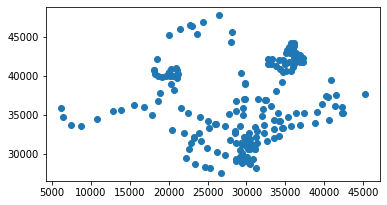

In [18]:
stn.plot()

In [43]:
stn.head()

,OBJECTID,STN_NAME,STN_NO,geometry
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078)
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302)
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568)
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548)
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820)


In [55]:
stn_code = []
for st in stn["STN_NO"].tolist():
    if " / " in st:
        sts = st.split(" / ")
        stn_code.append(sts[0])
    else:
        stn_code.append(st)
len(stn_code)

183

In [56]:
stn["PT_CODE1"] = stn_code

In [57]:
stn.head()

,OBJECTID,STN_NAME,STN_NO,geometry,PT_CODE1
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078),EW7
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302),EW25
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568),NS14
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548),NS7
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820),EW18


add one column that store only one code for one station

In [58]:
stn[stn["STN_NO"]!=stn["PT_CODE1"]]

,OBJECTID,STN_NAME,STN_NO,geometry,PT_CODE1
19,20,JURONG EAST MRT STATION,EW24 / NS1,POINT (17869.081 35038.947),EW24
86,95,CITY HALL MRT STATION,EW13 / NS25,POINT (30144.285 30591.848),EW13
92,101,HARBOURFRONT MRT STATION,NE1 / CC29,POINT (26678.344 27555.059),NE1
106,115,BAYFRONT MRT STATION,DT16 / CE1,POINT (30867.009 29368.625),DT16
177,186,RAFFLES PLACE MRT STATION,EW14 / NS26,POINT (30019.180 29617.613),EW14


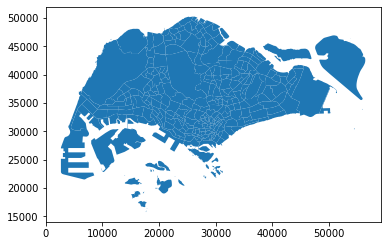

In [48]:
gdf_subzone = gpd.read_file(os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp"))
gdf_subzone.plot()

In [59]:
gdf_stn_prep = gpd.sjoin(stn, gdf_subzone, how="left", lsuffix='pt', rsuffix='szone')
gdf_stn_prep.head()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'proj': 'tmerc', 'lat_0': 1.366666666666667, 'lon_0': 103.8333333333333, 'k': 1, 'x_0': 28001.642, 'y_0': 38744.572, 'datum': 'WGS84', 'units': 'm', 'no_defs': True, 'wktext': True} != {'proj': 'tmerc', 'lat_0': 1.366666666666667, 'lon_0': 103.8333333333333, 'k': 1, 'x_0': 28001.642, 'y_0': 38744.572, 'datum': 'WGS84', 'units': 'm', 'no_defs': True})
  "(%s != %s)" % (left_df.crs, right_df.crs)


,OBJECTID_pt,STN_NAME,STN_NO,geometry,PT_CODE1,index_szone,OBJECTID_szone,SUBZONE_NO,SUBZONE_N,SUBZONE_C,...,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078),EW7,169,170,5,GEYLANG EAST,GLSZ05,...,GEYLANG,GL,CENTRAL REGION,CR,58687154BD252A0A,2014-12-05,35237.1681,33246.0587,7028.340071,2.579087e+06
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302),EW25,146,147,4,LAKESIDE,JESZ04,...,JURONG EAST,JE,WEST REGION,WR,3BBFD45071B70ECF,2014-12-05,16697.0118,35114.9062,8828.633830,3.108023e+06
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568),NS14,316,317,8,KHATIB,YSSZ08,...,YISHUN,YS,NORTH REGION,NR,DC75517DA31123DB,2014-12-05,27480.6357,44420.6884,4956.145735,1.432913e+06
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548),NS7,280,281,2,TURF CLUB,SKSZ02,...,SUNGEI KADUT,SK,NORTH REGION,NR,17459E60C3EEAF30,2014-12-05,20234.6006,44507.1901,7665.676019,3.291406e+06
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820),EW18,4,5,3,REDHILL,BMSZ03,...,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05


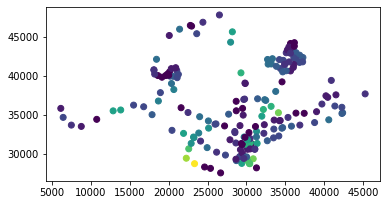

In [60]:
gdf_stn_prep.plot(column='SUBZONE_NO')

In [61]:
gdf_stn_prep.to_file(os.path.join(data_dir, "train_station_wszone.shp"))

In [62]:
gdf_stn_prep[pd.isnull(gdf_stn_prep["SUBZONE_N"])]

,OBJECTID_pt,STN_NAME,STN_NO,geometry,PT_CODE1,index_szone,OBJECTID_szone,SUBZONE_NO,SUBZONE_N,SUBZONE_C,...,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
